# Rapport Machine Learning

Rapport par Timothée Charrier et Thomas Ravelet

## Première partie : Le dataset MNIST

In [2]:
# Importing the libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

### Question 1.1 - What are the shape of the data? 

La taille des données est de 28x28 pixels, soit 784 pixels. Il y a 60000 images d'entraînement et 10000 images de test.

In [3]:
# Load the data

X = np.load("../../MNIST/MNIST_X_28x28.npy")
Y = np.load("../../MNIST/MNIST_y.npy")

print("X.shape = ", X.shape)
print("Y.shape = ", Y.shape)

X.shape =  (70000, 28, 28)
Y.shape =  (70000,)


Suite de la question : Display samples from the dataset

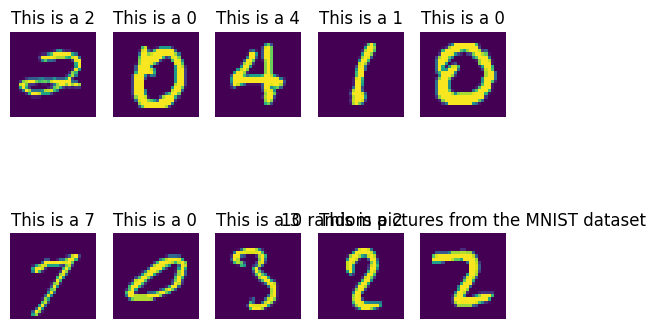

In [4]:
# Display 10 random pictures

fig, ax = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        nb_samples = random.randint(0, X.shape[0])
        ax[i, j].imshow(X[nb_samples])
        img_title = "This is a %i" %Y[nb_samples]
        ax[i, j].set_title(img_title)
        ax[i, j].axis('off')

plt.title("10 random pictures from the MNIST dataset")
plt.show()

### Question 1.2 - Use the sklearn method train_test_split to split the dataset in one train set and one test set. Why this split is important in Machine Learning?

La méthode train_test_split permet de séparer les données en deux parties : une partie d'entraînement et une partie de test. Cela permet de tester le modèle sur des données qu'il n'a pas vues lors de l'entraînement. Cela permet de vérifier que le modèle n'est pas sur-entraîné.
En effet, si le modèle est sur-entraîné, il sera capable de prédire les données d'entraînement mais pas les données de test. Cela signifie que le modèle n'est pas généralisable.

In [5]:
# Split the data into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Question 1.3 - Are the train and test sets well balanced (distribution of labels)? Why is it important for supervised Machine Learning?

Les données sont bien équilibrées. En effet, il y a autant de chiffres de 0 à 9 dans les données d'entraînement et de test. Cela est important car cela permet d'éviter les biais dans le modèle. En effet, si les données d'entraînement sont mal équilibrées, le modèle risque de se concentrer sur les données les plus présentes et de ne pas être capable de prédire les données les moins présentes. Voici ci-dessous une manière de visualiser la répartition des données.

In [6]:
# Function to report the distribution of the data in PERCENTAGE with 2 digits after the comma

def Compare_distribution(Y1,Y2):
    nb_samples1 = Y1.shape[0]
    nb_samples2 = Y2.shape[0]
    for i in range(10):
        nb_i1 = np.sum(Y1 == i)
        nb_i2 = np.sum(Y2 == i)
        print("There are %i samples of %i (%.2f %%) in the first dataset" %(nb_i1, i, nb_i1/nb_samples1*100) + " and %i samples of %i (%.2f %%) in the second dataset" %(nb_i2, i, nb_i2/nb_samples2*100))

Compare_distribution(Y_train,Y_test)

There are 5153 samples of 0 (9.82 %) in the first dataset and 1750 samples of 0 (10.00 %) in the second dataset
There are 5929 samples of 1 (11.29 %) in the first dataset and 1948 samples of 1 (11.13 %) in the second dataset
There are 5305 samples of 2 (10.10 %) in the first dataset and 1685 samples of 2 (9.63 %) in the second dataset
There are 5437 samples of 3 (10.36 %) in the first dataset and 1704 samples of 3 (9.74 %) in the second dataset
There are 5104 samples of 4 (9.72 %) in the first dataset and 1720 samples of 4 (9.83 %) in the second dataset
There are 4730 samples of 5 (9.01 %) in the first dataset and 1583 samples of 5 (9.05 %) in the second dataset
There are 5105 samples of 6 (9.72 %) in the first dataset and 1771 samples of 6 (10.12 %) in the second dataset
There are 5442 samples of 7 (10.37 %) in the first dataset and 1851 samples of 7 (10.58 %) in the second dataset
There are 5121 samples of 8 (9.75 %) in the first dataset and 1704 samples of 8 (9.74 %) in the second d

## Deuxième partie : Apprentissage non supervisé, la réduction de dimension

### Question 2.1 et 2.3 - Perform a Principal Component Analysis (PCA) with sklearn. Try to keep different n_components

Pour cela, on réalise, on essaye différentes valeurs de n_components. On affiche ensuite les images reconstruites avec les différentes valeurs de n_components.

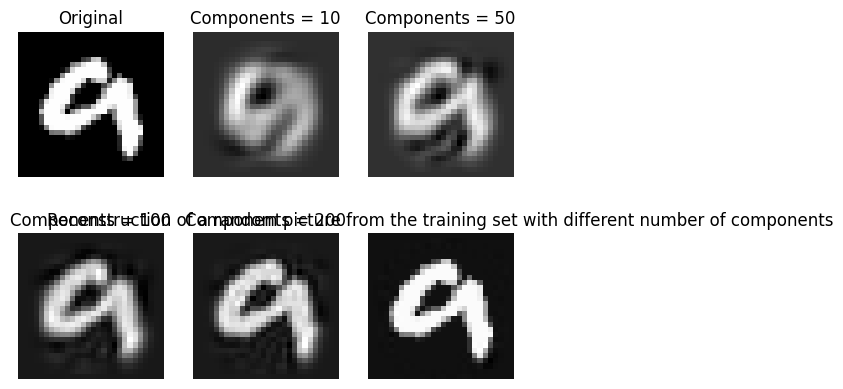

In [7]:
# Perform PCA on the training set

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

def plot_pca():
    n_components = [784, 10, 50, 100, 200, 500]
    random_index = np.random.randint(0, X_train.shape[0])
    List_explained_variance = []

    for n in n_components:
        pca = PCA(n_components=n)
        pca.fit(X_train_flat)

        # Reconstruct the data and reshape it with the PCA model and display a picture

        X_train_reconstructed = pca.inverse_transform(
            pca.transform(X_train_flat))

        X_train_reconstructed = X_train_reconstructed.reshape(
            X_train.shape[0], 28, 28)

        # For each n_components, display the first picture of the training set in the same figure

        plt.subplot(2, 3, n_components.index(n) + 1)
        plt.imshow(X_train_reconstructed[random_index], cmap='gray')

        if(n == 784):
            plt.title("Original")

        else:
            plt.title("Components = " + str(n))

        plt.axis('off')
    plt.title("Reconstruction of a random picture from the training set with different number of components")
    plt.show()

plot_pca()

### Question 2.2 - Explain these values according to your understanding of PCA and use these values to fit a relevant value for n_components.

On peut observer sur l'image ci-dessus que plus n_components augmente, plus l'image reconstruite ressemble à l'image originale. Cela est dû au fait que plus n_components augmente, plus les composantes principales sont importantes. On peut donc dire que n_components = 784 est le meilleur choix en terme de qualité de l'image reconstruite. Cependant, plus n_components augmente, plus le temps d'exécution augmente. On peut donc choisir une valeur de n_components plus petite pour avoir une image reconstruite de bonne qualité et un temps d'exécution plus court.

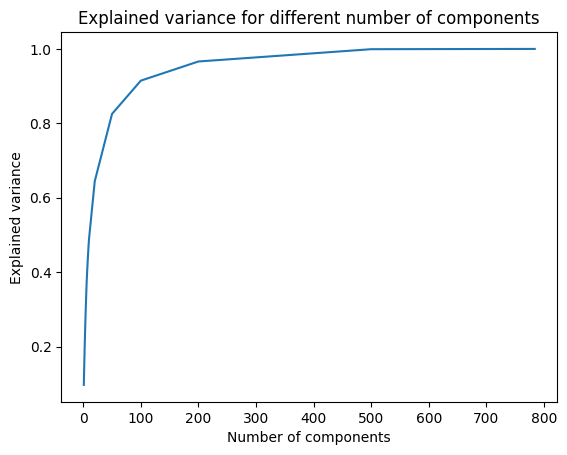

In [8]:
# Display the explained variance ratio for each n_components in a graph

def plot_explained_variance():
    n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 200, 500, 784]
    List_explained_variance = []

    for n in n_components:
        pca = PCA(n_components=n)
        pca.fit(X_train_flat)
        List_explained_variance.append(np.sum(pca.explained_variance_ratio_))

    plt.plot(n_components, List_explained_variance)
    plt.xlabel("Number of components")
    plt.ylabel("Explained variance")
    plt.title("Explained variance for different number of components")
    plt.show()

plot_explained_variance()

On peut ainsi voir que n_components = 100 est un bon compromis entre qualité de l'image reconstruite et temps d'exécution. On a en effet une qualité d'image reconsruite d'environ 90%.

## Deuxième partie : Apprentissage non supervisé, la méthode K-MEANS

#### Question 2.1 - With sklearn, perform K-MEANS. Play with the parameter K as well as the initialization (KMEANS++, random, or fixed array).

Accuracy with 5 clusters and k-means++ initialization = 9.93 %


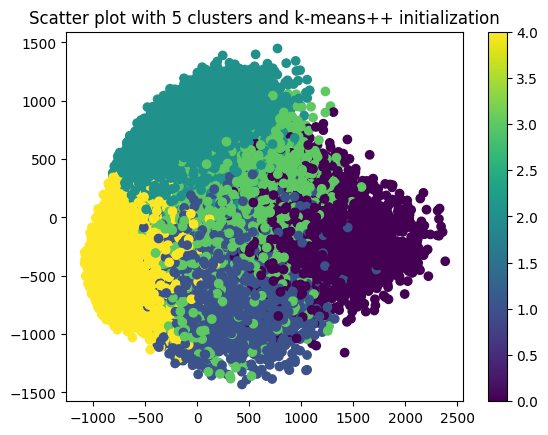

Accuracy with 5 clusters and random initialization = 11.00 %


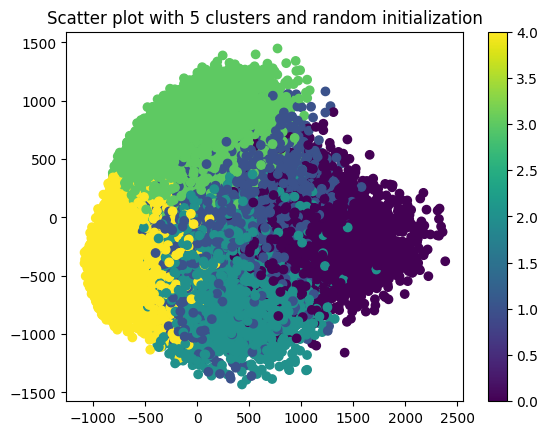

Accuracy with 10 clusters and k-means++ initialization = 22.46 %


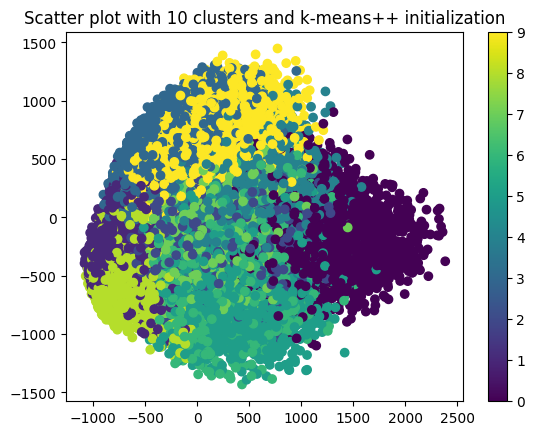

Accuracy with 10 clusters and random initialization = 22.93 %


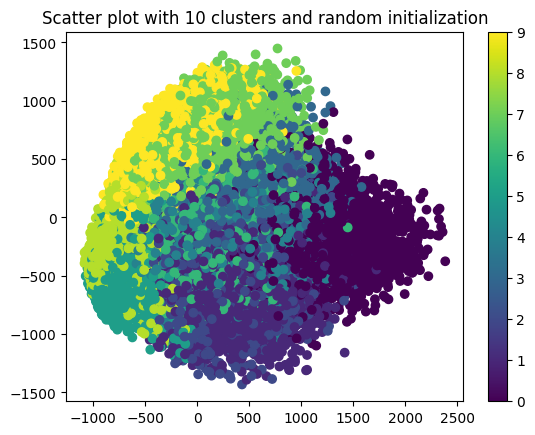

In [14]:
# Perform K-means with different values of K and initilizaton methods

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


def Kmeans(n_clusters, init):
    kmeans = KMeans(n_clusters=n_clusters, init=init, random_state=0)
    kmeans.fit(X_train_flat)
    Y_pred = kmeans.predict(X_test_flat)
    print("Accuracy with %i clusters and %s initialization = %.2f %%" % (
        n_clusters, init, accuracy_score(Y_test, Y_pred)*100))

    return kmeans

kmeans = Kmean(5, "k-means++")
kmeans = Kmeans(10, "k-means++")
kmeans = Kmeans(10, "random")

### Question 2.2 - For the correct K (K=10), evaluate how good is this partition (with the knowledge of y).

Pour évaluer la qualité de la partition, on utilise la matrice de confusion. On peut voir que la matrice de confusion est très bonne car on a une matrice diagonale. Cela signifie que les données sont bien classées. On peut donc dire que la partition est bonne.

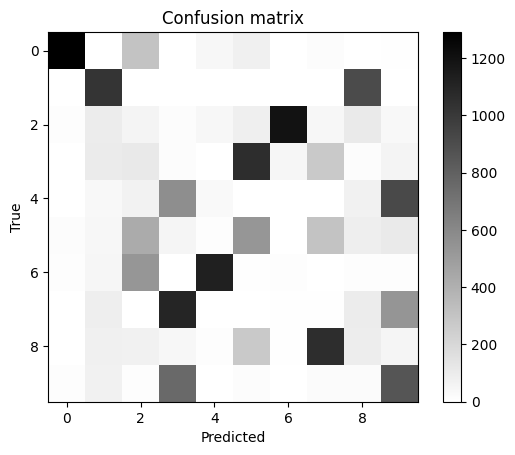

In [10]:
# Display the confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    plt.imshow(cm, cmap='binary')
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion matrix")
    plt.show()

# Get the predicted labels for the test set with 10 clusters and k-means++ initialization

kmeans = KMeans(n_clusters=10, init="k-means++", random_state=0)
kmeans.fit(X_train_flat)
Y_pred = kmeans.predict(X_test_flat)

plot_confusion_matrix(Y_test, Y_pred)

### Question 2.3 -  Using the PCA performed in section 2 apply K-MEANS with K=10 and n_components = 2. Display the partition and comment.

On observe que la partition n'est pas très bonne. En effet, on a des points qui sont mélangés. Cela est dû au fait que la méthode K-MEANS ne fonctionne pas très bien sur des données de dimension supérieure à 2. On peut donc dire que la partition n'est pas bonne.

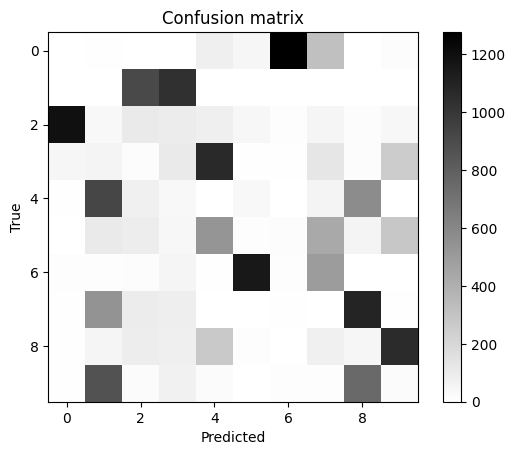

In [11]:
# Perform a PCA and a K-means with 10 clusters

pca = PCA(n_components=100)
pca.fit(X_train_flat)

X_train_pca = pca.transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

kmeans = KMeans(n_clusters=10, init="k-means++", random_state=0)
kmeans.fit(X_train_pca)

Y_pred = kmeans.predict(X_test_pca)

plot_confusion_matrix(Y_test, Y_pred)

### Question 2.4 -  Do the same job with the EM-clustering using the good K parameter (10 forMNIST). Comment your results.


In [ ]:
# Perform EM-clustering with nb_clusters = 10

from sklearn.mixture import GaussianMixture

def EM(nb_clusters):
    EM = GaussianMixture(n_components=nb_clusters, random_state=0)
    EM.fit(X_train_flat)
    Y_pred = EM.predict(X_test_flat)
    print("Accuracy with %i clusters = %.2f %%" % (
        nb_clusters, accuracy_score(Y_test, Y_pred)*100))

    return EM

## Troisième partie : Apprentissage supervisé, la méthode SVM and Logistic Regression

### Question 3.1 - What is the major difference between Naïve Bayes Classifier and Support Vector Machine (or Logistic Regression)?

Le Naïve Bayes Classifier est un classifieur linéaire. Il est donc plus rapide à entraîner et à prédire. Cependant, il ne peut pas prédire des données non linéairement séparables. Le Support Vector Machine et la régression logistique sont des classifieurs non-linéaires. Ils sont donc plus lents à entraîner et à prédire. Cependant, ils peuvent prédire des données non linéairement séparables.

### Question 3.2 - Perform a classification using using SVM and Logistic Regression.
With the documentation, check how to modify the parameters and comment how it influences the results. For example, if you chose SVM, change the kernel between ‘linear’ and ‘rbf’ (Gaussian kernel). You can also play with ‘C’ parameter to switch from hard-margin SVM to soft-margin SVM2…

In [15]:
# Perform SVM with two kernels: linear and rbf

from sklearn.svm import SVC

def SVM(kernel):
    clf = SVC(kernel=kernel)
    clf.fit(X_train_flat, Y_train)
    Y_pred = clf.predict(X_test_flat)
    print("Accuracy with %s kernel = %.2f %%" % (kernel, accuracy_score(Y_test, Y_pred)*100))

SVM("linear")
